<a href="https://colab.research.google.com/github/mak4x13/Machine-Learning/blob/main/Breast_Cancer_Prediction_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dataset import load_breast_cancer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

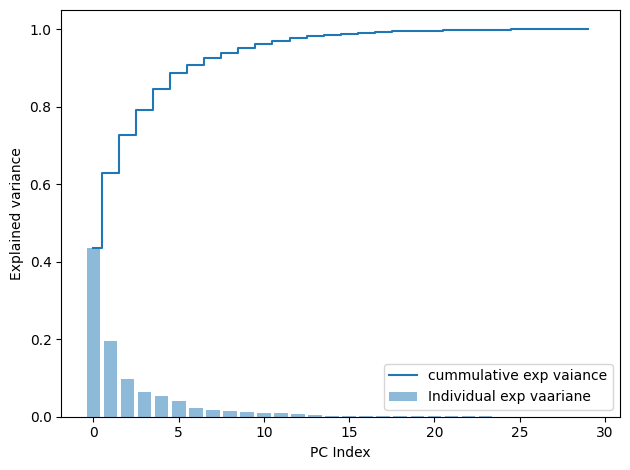

In [ ]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train_std)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label="Individual exp vaariane")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='cummulative exp vaiance')
plt.ylabel("Explained variance")
plt.xlabel("PC Index")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# print(exp_var_pca, '\n', cum_sum_eigenvalues)

[4.35027816e-01 1.95000069e-01 9.78151887e-02 6.48640944e-02
 5.25337760e-02 4.11279962e-02 2.23559034e-02 1.64795219e-02
 1.38005190e-02 1.20526216e-02 1.05656532e-02 8.83487978e-03
 7.72384348e-03 5.31689053e-03 2.90035907e-03 2.74863963e-03
 2.02120554e-03 1.81312048e-03 1.63703163e-03 1.03921453e-03
 9.98523858e-04 8.78835623e-04 8.09819261e-04 5.76666950e-04
 4.96295906e-04 2.76290404e-04 2.25813282e-04 5.07660981e-05
 2.45885848e-05 4.05623540e-06] 
 [0.43502782 0.63002788 0.72784307 0.79270717 0.84524094 0.88636894
 0.90872484 0.92520437 0.93900488 0.95105751 0.96162316 0.97045804
 0.97818188 0.98349877 0.98639913 0.98914777 0.99116898 0.9929821
 0.99461913 0.99565834 0.99665687 0.9975357  0.99834552 0.99892219
 0.99941849 0.99969478 0.99992059 0.99997136 0.99999594 1.        ]


In [ ]:
pca.components_

array([[ 2.16014846e-01,  1.01699596e-01,  2.25181465e-01,
         2.18534830e-01,  1.48981569e-01,  2.40835871e-01,
         2.59499690e-01,  2.63324252e-01,  1.46217348e-01,
         6.57406649e-02,  2.03918546e-01,  2.34543987e-02,
         2.09023919e-01,  1.99502970e-01,  2.15718507e-02,
         1.65762530e-01,  1.49054410e-01,  1.82429814e-01,
         4.76642673e-02,  9.87533276e-02,  2.26391948e-01,
         1.05122879e-01,  2.36126297e-01,  2.24215789e-01,
         1.32347855e-01,  2.11297039e-01,  2.29556005e-01,
         2.52917161e-01,  1.27240897e-01,  1.32340793e-01],
       [-2.40040164e-01, -5.12630139e-02, -2.22160786e-01,
        -2.36489281e-01,  1.69316336e-01,  1.50134402e-01,
         6.40373456e-02, -3.96395631e-02,  1.83279546e-01,
         3.61447295e-01, -1.08859253e-01,  9.69510543e-02,
        -9.16036710e-02, -1.53645976e-01,  1.94465623e-01,
         2.37907034e-01,  2.07841771e-01,  1.43048104e-01,
         1.74509277e-01,  2.81101891e-01, -2.24547535e-

In [ ]:
pca

PCA()